# Fellowship.ai Internship


**Candidate Name : MASNA**

**NLP Challenge:**

IMDB Dataset of 50K Movie Reviews to perform Sentiment analysis
About Dataset
IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

In [89]:
# Importing Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Loading Dataset

df = pd.read_csv("IMDB Dataset.csv")

In [91]:
# Printing Top 5 Rows

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [92]:
# Printing Random 10 Rows

df.sample(10)

,review,sentiment
41617,When taken as a whole for its ideas and dissec...,positive
14531,Alicianne (Laurel Barnett) becomes a live in b...,negative
18910,"with very little screen time and money, Dan Ka...",positive
27745,I gave this movie a 10 because it needed to be...,positive
25203,A truly excellent look at the world and the re...,positive
23700,"Semper Fi! I saw ""The D.I."" in 1957. Two-and-a...",positive
12863,"Army private Gene Kelly, who's also a talented...",negative
19350,This film is about the encounters of 7 couples...,negative
13648,"first, someone mentioned here that because thi...",positive
18727,"It's easy to forget, once later series had dev...",positive


In [93]:
df.shape

(50000, 2)

In [94]:
# Printing Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [95]:
# Printing Null Values

df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [96]:
# Printing Duplicated Values

df.duplicated().sum()

418

In [97]:
# Removing Duplicated Values

df.drop_duplicates(inplace=True)

In [98]:
# Printing Duplicated Values After Removing Duplicated

df.duplicated().sum()

0

In [99]:
# Printing First review column

df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [100]:
df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

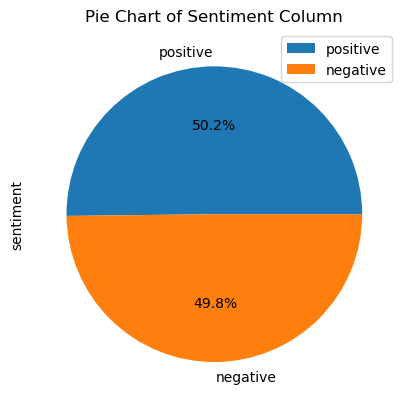

In [101]:
# Visualize the Pie Chart of Sentiment Column

df.sentiment.value_counts().plot(kind='pie', autopct='%1.1f%%', title='Pie Chart of Sentiment Column', legend=True)
plt.show()

**Text Cleaning**

Removing Html tags

Converting every thing to lowercase

Removing special characters

Removing Stop words

Lemmatization

In [102]:
# In sentiment column converting positive to 1 and negative to 0

df.sentiment = df.sentiment.replace({'positive':1, 'negative':0})

**Removing Html tag**

In [103]:
# In Review column first row before removing html tag

df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [104]:
# removing html tag in First ROW 

import re
clean = re.compile('<.*?>')

# In Review column first row after removing html tag

re.sub(clean, '',  df.iloc[0].review)

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [105]:

# Function to clean html tags

def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [106]:
# Appling Removing html tags function

df.review = df.review.apply(clean_html)

**Converting every thing to lowercase**

In [107]:
# converting everything to lower

def convert_lower(text):
    return text.lower()


In [108]:
# Appling convert_lower function

df.review = df.review.apply(convert_lower)

In [109]:
df.review[0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

**Removing special characters**

In [110]:
# function to remove special characters

def remove_special_chars(text):
    clean = re.compile('[^a-zA-Z ]')
    return re.sub(clean, '', text)

In [111]:
# Appling remove_special_chars function

df.review = df.review.apply(remove_special_chars)

In [112]:
df.review[0]

'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty picture

In [113]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Removing Stop words**

In [114]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [115]:
# Removing Stopwords from Review Column

sw_list = stopwords.words('english')

df.review = df.review.apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [116]:
# In Review column first row after removing Stopwords

df.review[0]

'one reviewers mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle cl

**Applying Lemmatization**

In [117]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ideapad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [118]:
import nltk
from nltk.stem import WordNetLemmatizer

In [125]:
# Function for Lemmatization

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    lemmatized_text = " ".join([lemmatizer.lemmatize(token) for token in tokens])
    return lemmatized_text

In [126]:
# In Review column first row before applying Lemmatization Function

df.review[0]

'one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison bit

In [127]:
# Applying Lemmatization Function

df.review = df.review.apply(lemmatize_text)

In [128]:
# In Review column first row after applying Lemmatization Function

df.review[0]

'one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison bit

In [129]:
df['clean_text'] = df.review

**Model Building**

In summary, the steps involved in building a machine learning model include data preparation, splitting the data into training, validation, and test sets, choosing an appropriate model, training the model on the training data, evaluating the model on the validation and test sets, fine-tuning the model based on the evaluation results, and finally deploying the model for making predictions on new data.

In [130]:
X = df.clean_text

In [131]:
X

0        one reviewer mentioned watching oz episode you...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically there family little boy jake think t...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary school nu...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movie high art fan expec...
Name: clean_text, Length: 49582, dtype: object

In [132]:
y = df.sentiment

In [133]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 49582, dtype: int64

**Train Test Split**

Train-test split is a technique used in machine learning to evaluate the performance of a model on new, unseen data. It involves splitting the available data into two subsets - a training set and a test set. The model is trained on the training set and its performance is evaluated on the test set. This allows the model to learn patterns from the training data and be evaluated on how well it can generalize to new data. The goal of train-test split is to ensure that the model is not overfitting the training data and can perform well on new data. Typically, around 70-80% of the data is used for training, and the remaining 20-30% is used for testing. Cross-validation is another technique that can be used in combination with train-test split to further evaluate the model's performance.



In [134]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X, y, test_size=0.2, random_state=42)

**Bag of Word Representation**

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

We will use CountVectorizer **to convert text into a matrix of token count.**

Bag of Words: https://machinelearningmastery.com/gentle-introduction-bag-words-model/

Code Example: https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

**We are going to perform below mentioned steps to understand the entire process:**
a. Converting text to numerical vectors with the help of CountVectorizer
b. Understand fit and transform
c. Looking at vocabulary_
d. Converting sparse matrix to dense matrix using toarray()
e. Understanding n_gram

**Advantages**
It is simple to understand and implement like OneHotEncoding.
We have a fixed length encoding for any sequence of arbitrary length.
Documents with same words/vocabulary will have similar representation. So if two documents have a similar vocabulary, they’ll be closer to each other in the vector space and vice versa.
**Disadvantages**
The size of vector increases with the size of the vocabulary. Thus, sparsity continues to be a problem. One way to control it is by limiting the vocabulary to n number of the most frequent words.
It does not capture the similarity between different words that mean the same thing. i.e. Semantic Meaning is not captured.
a. "walk", "walked", and "walking". BoW vectors of all three tokens will be equally apart.
b. "search" and "explore" are synonyms. BoW won't capture the semantic similarity of these words.

This representation does not have any way to handle out of vocabulary (OOV) words (i.e., new words that were not seen in the corpus that was used to build the vectorizer).
As the name indicates, it is a “bag” of words. Word order information is lost in this representation. One way to control it is by using n-grams.
It suffers from **curse of high dimensionality.**

In [135]:
from sklearn.feature_extraction.text import CountVectorizer

In [136]:
vocab = CountVectorizer()

In [137]:
X_train_bow = vocab.fit_transform(X_train_bow)

In [138]:
X_test_bow = vocab.transform(X_test_bow)

In [139]:
X_train_bow

<39665x175730 sparse matrix of type '<class 'numpy.int64'>'
	with 3834096 stored elements in Compressed Sparse Row format>

In [140]:
X_test_bow

<9917x175730 sparse matrix of type '<class 'numpy.int64'>'
	with 928119 stored elements in Compressed Sparse Row format>

In [141]:
# We can look at unique words by using 'vocabulary_'

vocab.vocabulary_

{'really': 125331,
 'liked': 88528,
 'movie': 100985,
 'emporers': 47127,
 'new': 104767,
 'groove': 65264,
 'watching': 168207,
 'like': 88505,
 'coming': 29527,
 'home': 71897,
 'seeing': 135463,
 'wife': 170819,
 'relation': 126792,
 'llama': 89485,
 'seriously': 136995,
 'bad': 11206,
 'club': 28253,
 'dread': 43477,
 'super': 149487,
 'trooper': 159873,
 'supposed': 149909,
 'write': 173180,
 'line': 88790,
 'dont': 42488,
 'even': 49692,
 'know': 84300,
 'else': 46623,
 'say': 133042,
 'laughed': 86406,
 'couple': 32713,
 'time': 156315,
 'drinking': 43742,
 'least': 86941,
 'funny': 59763,
 'drunk': 44007,
 'maybe': 94844,
 'regular': 126554,
 'cartoon': 23174,
 'people': 114859,
 'arent': 8046,
 'either': 46136,
 'way': 168496,
 'stick': 146532,
 'want': 167554,
 'llamathemed': 89486,
 'right': 129209,
 'decided': 36928,
 'watch': 168113,
 'noted': 106764,
 'scariest': 133336,
 'ever': 49788,
 'thats': 153732,
 'expected': 51002,
 'unfortunately': 162710,
 'found': 58178,
 'did

In [142]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Type of train features:", type(X_test_bow))

print("Shape of input data:", X_train_bow.shape)

print("Shape of input data:", X_test_bow.shape)

Total unique words: 175730
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (39665, 175730)
Shape of input data: (9917, 175730)


In [143]:
from sys import getsizeof

print(type(X_train_bow))
print(getsizeof(X_train_bow), "Bytes")

<class 'scipy.sparse._csr.csr_matrix'>
48 Bytes


**Logistic Regression**


Logistic Regression is a statistical model used for binary classification tasks where the goal is to predict the probability of an event occurring. It works by fitting a logistic function to the input data, which maps the input to a probability value between 0 and 1. The logistic function is then used to make predictions by applying a threshold to the probability value, classifying the input as either one of the two possible classes. Logistic Regression is widely used in various fields such as finance, healthcare, and marketing, and can be implemented using various optimization techniques such as gradient descent.

In [51]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_bow, y_train_bow)

C:\Users\ideapad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_test_pred = classifier.predict(X_test_bow)

**accuracy_score**

is a function used to evaluate the performance of a classification model by computing the proportion of correct predictions made by the model over the total number of predictions. It is a simple and commonly used metric for evaluating the performance of a model.

**classification_report**

is a function used to generate a summary report of the classification performance of a model. It includes various metrics such as precision, recall, and F1-score for each class, as well as the overall accuracy of the model. It is a useful tool for gaining insight into the strengths and weaknesses of a model's classification performance, and can be used to compare the performance of different models.

In [59]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test_bow, y_test_pred))

print(classification_report(y_test_bow, y_test_pred))

0.8481395583341736
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4939
           1       0.85      0.85      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



**Decision Tree Classifier**


DecisionTreeClassifier is a machine learning algorithm used for classification tasks. It works by constructing a decision tree that recursively splits the input data based on the most important features until the data can be classified into distinct classes. The splitting criteria is determined by maximizing the information gain or minimizing the impurity of the resulting splits. The resulting decision tree can be used to make predictions for new input data by traversing the tree from the root to a leaf node corresponding to the predicted class. DecisionTreeClassifier is widely used in various fields such as finance, healthcare, and marketing, and can be used for both binary and multi-class classification tasks. However, it is prone to overfitting and may require regularization techniques such as pruning to improve generalization performance.

In [60]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_bow, y_train_bow)

DecisionTreeClassifier()

In [61]:
y_test_pred = classifier.predict(X_test_bow)

In [62]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test_bow, y_test_pred))

print(classification_report(y_test_bow, y_test_pred))

0.7113038217202783
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      4939
           1       0.71      0.71      0.71      4978

    accuracy                           0.71      9917
   macro avg       0.71      0.71      0.71      9917
weighted avg       0.71      0.71      0.71      9917



**Random Forest Classifier**


RandomForestClassifier is a machine learning algorithm used for classification tasks. It works by constructing a large number of decision trees (known as an ensemble) and aggregating the results of each tree to make a final prediction. Each tree in the ensemble is trained on a randomly selected subset of the input data and a randomly selected subset of the features, which helps to reduce overfitting and improve generalization performance. The final prediction is determined by a majority vote of the individual tree predictions. RandomForestClassifier is widely used in various fields such as finance, healthcare, and marketing, and is known for its high accuracy and robustness to noisy data. However, it may require more computational resources than other classification algorithms due to its large ensemble of decision trees.

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_bow, y_train_bow)

RandomForestClassifier()

In [64]:
y_test_pred = classifier.predict(X_test_bow)

In [65]:

from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test_bow, y_test_pred))

print(classification_report(y_test_bow, y_test_pred))

0.8475345366542301
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4939
           1       0.85      0.85      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917




**MultinomialNB (Naive Bayes)**

MultinomialNB (Naive Bayes) is a machine learning algorithm used for classification tasks, particularly in natural language processing applications. It is based on the Bayes theorem and assumes that the features are conditionally independent given the class label. MultinomialNB is commonly used for text classification tasks, such as sentiment analysis and spam filtering. It works by computing the probability of each class given the input data and selecting the class with the highest probability as the predicted class. The algorithm models the probability distribution of the input features using a multinomial distribution, which assumes that the input features are counts of the frequency of occurrence of each term in a document or corpus. MultinomialNB is known for its simplicity, speed, and good performance in many text classification tasks, but may not be the best choice for data with complex dependencies between features.

In [66]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_bow, y_train_bow)

MultinomialNB()

In [67]:
y_test_pred = classifier.predict(X_test_bow)

In [68]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test_bow, y_test_pred))

print(classification_report(y_test_bow, y_test_pred))

0.8559040032267823
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4939
           1       0.87      0.84      0.85      4978

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



**BernoulliNB (Naive Bayes)**


BernoulliNB (Naive Bayes) is a machine learning algorithm used for classification tasks. It is similar to GaussianNB but is designed for binary or boolean features, where each feature takes only two values, 0 or 1. BernoulliNB works by computing the probability of each class given the input data and selecting the class with the highest probability as the predicted class. The algorithm models the probability distribution of the input features using a Bernoulli distribution, which assumes that each feature is a binary random variable with a certain probability of occurrence. BernoulliNB is known for its simplicity, speed, and good performance in many classification tasks, especially when the input features are binary or sparse. However, it may not perform well in cases where the features are highly correlated or have complex dependencies.

In [69]:
from sklearn.naive_bayes import BernoulliNB

In [70]:
classifier = BernoulliNB()
classifier.fit(X_train_bow, y_train_bow)


BernoulliNB()

In [71]:
y_test_pred = classifier.predict(X_test_bow)

In [72]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test_bow, y_test_pred))

print(classification_report(y_test_bow, y_test_pred))

0.85378642734698
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4939
           1       0.87      0.83      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



**KNeighborsClassifier**


KNeighborsClassifier is a machine learning algorithm used for classification tasks. It works by finding the k-nearest neighbors to the input data point in the feature space and classifying the input data based on the most common class among its k-nearest neighbors. The algorithm uses a distance metric, such as Euclidean or Manhattan distance, to measure the distance between input data points and the training data points. KNeighborsClassifier is a simple and effective algorithm, especially for low-dimensional data, and can handle multi-class classification tasks. However, the algorithm can be sensitive to the choice of k and the distance metric used, and can be computationally expensive for large datasets.

In [73]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_bow, y_train_bow)

KNeighborsClassifier()

In [74]:
y_test_pred = classifier.predict(X_test_bow)

In [75]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test_bow, y_test_pred))

print(classification_report(y_test_bow, y_test_pred))

0.6110718967429666
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      4939
           1       0.61      0.64      0.62      4978

    accuracy                           0.61      9917
   macro avg       0.61      0.61      0.61      9917
weighted avg       0.61      0.61      0.61      9917



**Gradient Boosting Classifier**


Gradient Boosting Classifier is a machine learning algorithm used for classification tasks. It is a type of boosting algorithm that works by iteratively adding decision trees to an ensemble, with each new tree correcting the errors of the previous trees. GradientBoostingClassifier optimizes the loss function of the model using gradient descent to find the optimal parameters of each tree. It is a powerful algorithm that can handle complex interactions between features and is known for its high accuracy in many classification tasks. However, it can be sensitive to the choice of hyperparameters and may require careful tuning to achieve good performance. GradientBoostingClassifier is widely used in various fields such as finance, healthcare, and marketing.

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_bow, y_train_bow)

GradientBoostingClassifier()

In [73]:
y_test_pred = classifier.predict(X_test_bow)

In [74]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test_bow, y_test_pred))

print(classification_report(y_test_bow, y_test_pred))

0.7920742159927397
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      4939
           1       0.76      0.85      0.80      4978

    accuracy                           0.79      9917
   macro avg       0.80      0.79      0.79      9917
weighted avg       0.80      0.79      0.79      9917



**AdaBoost Classifier**

AdaBoostClassifier is a machine learning algorithm used for classification tasks. It is a type of boosting algorithm that works by iteratively adding weak classifiers to an ensemble, with each new classifier focused on classifying the misclassified samples of the previous classifiers. AdaBoostClassifier assigns a weight to each training sample, which is updated after each iteration based on the accuracy of the previous classifiers. The final prediction is determined by a weighted majority vote of the individual classifier predictions. AdaBoostClassifier is a powerful algorithm that can improve the performance of weak classifiers and is known for its ability to handle complex classification problems. However, it can be sensitive to noisy data and outliers and may require careful tuning of hyperparameters to achieve good performance. AdaBoostClassifier is widely used in various fields such as finance, healthcare, and marketing.

In [75]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_bow, y_train_bow)

AdaBoostClassifier()

In [76]:
y_test_pred = classifier.predict(X_test_bow)

In [77]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test_bow, y_test_pred))

print(classification_report(y_test_bow, y_test_pred))

0.7868306947665624
              precision    recall  f1-score   support

           0       0.81      0.74      0.78      4939
           1       0.76      0.83      0.80      4978

    accuracy                           0.79      9917
   macro avg       0.79      0.79      0.79      9917
weighted avg       0.79      0.79      0.79      9917



**XGB Classifier**

XGB Classifier (Extreme Gradient Boosting Classifier) is a machine learning algorithm used for classification tasks. It is a type of boosting algorithm that works by iteratively adding decision trees to an ensemble, with each new tree focused on reducing the errors of the previous trees. XGBClassifier optimizes the loss function of the model using gradient descent to find the optimal parameters of each tree. It also uses regularization techniques to prevent overfitting and improve generalization performance. XGBClassifier is known for its high accuracy and speed in many classification tasks, especially in large-scale and high-dimensional datasets. It can handle missing data and outliers and can automatically handle feature selection and feature engineering. However, it may require careful tuning of hyperparameters and can be computationally expensive for very large datasets. XGBClassifier is widely used in various fields such as finance, healthcare, and marketing.

In [78]:
import xgboost as xgb
classifier = xgb.XGBClassifier()
classifier.fit(X_train_bow, y_train_bow)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [79]:
y_test_pred = classifier.predict(X_test_bow)

In [80]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test_bow, y_test_pred))

print(classification_report(y_test_bow, y_test_pred))

0.846324493294343
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4939
           1       0.83      0.87      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



# In Bag of Words LogisticRegression is giving good accuracy with Instant time

# Term Frequency Inverse Document Frequency

**Term Frequency Inverse Document Frequency**


In BOW approach all the words in the text are treated as equally important i.e. there's no notion of some words in the document being more important than others. TF-IDF, or term frequency-inverse document frequency, addresses this issue. It aims to quantify the importance of a given word relative to other words in the document and in the corpus.

Let's now try to understand:

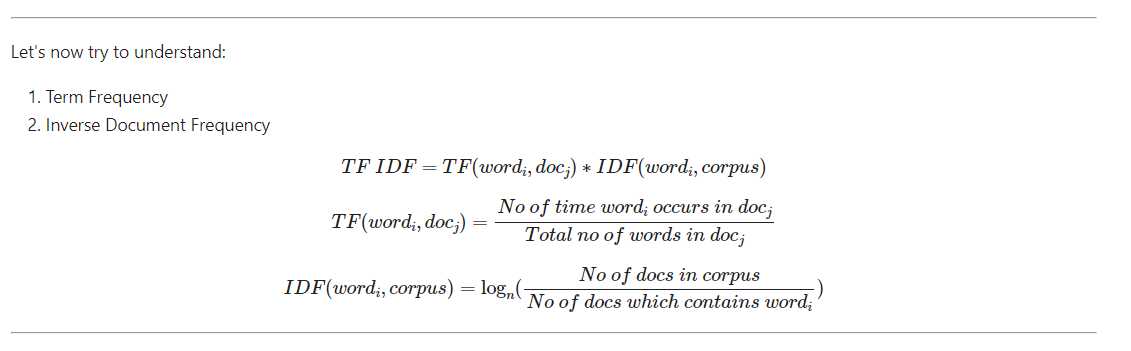
 
 
Advantages
If the word is rare in the corpus, it will be given more importance. (i.e. IDF)
If the word is more frequent in a document, it will be given more importance. (i.e. TF)
Disadvantages
Same as BOW

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [145]:
df['GRAMS'] = df.review

In [146]:
df.head()

,review,sentiment,clean_text,GRAMS
0,one reviewer mentioned watching oz episode you...,1,one reviewer mentioned watching oz episode you...,one reviewer mentioned watching oz episode you...
1,wonderful little production filming technique ...,1,wonderful little production filming technique ...,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...,1,thought wonderful way spend time hot summer we...,thought wonderful way spend time hot summer we...
3,basically there family little boy jake think t...,0,basically there family little boy jake think t...,basically there family little boy jake think t...
4,petter matteis love time money visually stunni...,1,petter matteis love time money visually stunni...,petter matteis love time money visually stunni...


In [147]:
X = df.GRAMS

In [148]:
X

0        one reviewer mentioned watching oz episode you...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically there family little boy jake think t...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary school nu...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movie high art fan expec...
Name: GRAMS, Length: 49582, dtype: object

In [149]:
y = df.sentiment

In [150]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 49582, dtype: int64

In [151]:
from sklearn.model_selection import train_test_split

X_train_ngrams, X_test_ngrams, y_train_ngrams, y_test_ngrams = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,3))
X_train_ngrams = vectorizer.fit_transform(X_train_ngrams)
X_test_ngrams = vectorizer.transform(X_test_ngrams)

**Logistic Regression**

In [67]:
from sklearn.linear_model import LogisticRegression

# Train the model on the n-grams
clf = LogisticRegression()
clf.fit(X_train_ngrams, y_train_ngrams)

# Evaluate the model on the test set
y_test_pred = clf.predict(X_test_ngrams)
accuracy = clf.score(X_test_ngrams, y_test_ngrams)
print(f"Test set accuracy: {accuracy:.3f}")

Test set accuracy: 0.893


C:\Users\ideapad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test_ngrams, y_test_pred))

print(classification_report(y_test_ngrams, y_test_pred))

0.8930119995966522
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4939
           1       0.88      0.91      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



**MultinomialNB**

In [87]:
from sklearn.naive_bayes import MultinomialNB

# Train the model on the n-grams
clf = MultinomialNB()
clf.fit(X_train_ngrams, y_train_ngrams)

# Evaluate the model on the test set
y_test_pred = clf.predict(X_test_ngrams)
accuracy = clf.score(X_test_ngrams, y_test_ngrams)
print(f"Test set accuracy: {accuracy:.3f}")

from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test_ngrams, y_test_pred))

Test set accuracy: 0.885
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4939
           1       0.89      0.88      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model on the n-grams
clf = RandomForestClassifier()
clf.fit(X_train_ngrams, y_train_ngrams)

# Evaluate the model on the test set
y_test_pred = clf.predict(X_test_ngrams)
accuracy = clf.score(X_test_ngrams, y_test_ngrams)
print(f"Test set accuracy: {accuracy:.3f}")

from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test_ngrams, y_test_pred))

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the model on the n-grams
clf = DecisionTreeClassifier()
clf.fit(X_train_ngrams, y_train_ngrams)

# Evaluate the model on the test set
y_test_pred = clf.predict(X_test_ngrams)
accuracy = clf.score(X_test_ngrams, y_test_ngrams)
print(f"Test set accuracy: {accuracy:.3f}")

from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test_ngrams, y_test_pred))

**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model on the n-grams
clf = GradientBoostingClassifier()
clf.fit(X_train_ngrams, y_train_ngrams)

# Evaluate the model on the test set
y_test_pred = clf.predict(X_test_ngrams)
accuracy = clf.score(X_test_ngrams, y_test_ngrams)
print(f"Test set accuracy: {accuracy:.3f}")

from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test_ngrams, y_test_pred))

**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Train the model on the n-grams
clf = AdaBoostClassifier()
clf.fit(X_train_ngrams, y_train_ngrams)

# Evaluate the model on the test set
y_test_pred = clf.predict(X_test_ngrams)
accuracy = clf.score(X_test_ngrams, y_test_ngrams)
print(f"Test set accuracy: {accuracy:.3f}")

from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test_ngrams, y_test_pred))

**XGBoost Classifier**

In [ ]:

import xgboost as xgb

# Train the model on the n-grams
clf = xgb.XGBClassifier()
clf.fit(X_train_ngrams, y_train_ngrams)

# Evaluate the model on the test set
y_test_pred = clf.predict(X_test_ngrams)
accuracy = clf.score(X_test_ngrams, y_test_ngrams)
print(f"Test set accuracy: {accuracy:.3f}")

from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test_ngrams, y_test_pred))

**Latent Space**

A latent space, also known as a latent feature space or embedding space, is an embedding of a set of items within a manifold in which items which resemble each other more closely are positioned closer to one another in the latent space.

**Word Embeddings (Word Vectors)**

In natural language processing (NLP), word embedding is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning. Word embeddings can be obtained using a set of language modeling and feature learning techniques where words or phrases from the vocabulary are mapped to vectors of real numbers.

Methods to generate this mapping include neural networks, dimensionality reduction on the word co-occurrence matrix, probabilistic models, explainable knowledge base method, and explicit representation in terms of the context in which words appear.

Traditionally, one of the main limitations of word embeddings (word vector space models in general) is that words with multiple meanings are conflated into a single representation (a single vector in the semantic space). In other words, polysemy and homonymy are not handled properly.

Word2Vec
"You shall know the word by the company it keeps." by JR Firth

Distributional Semantics (i.e. a word is characterized by the company it keeps)
W2v works well because there is an idea of meaning distribution in the context.

Algorithms to generate Word2Vec Embeddings

SkipGram
Continuous Bag of Words
Issue
Even if the word is having three different meaning, W2v will return the weighted average of all three as the output. Now the question is,

Is it possible to segregate the three vectors to represent the words based in the context?
Is it possible to disambiguate the word vectors based on the context?
Word2Vec is not capturing the contextual information. This is where BERT comes handy.

In [71]:
pip install --upgrade gensim

     ---------------------------------------- 24.0/24.0 MB 4.2 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.0
    Uninstalling gensim-4.3.0:
      Successfully uninstalled gensim-4.3.0
Note: you may need to restart the kernel to use updated packages.


In [153]:
import gensim

print("gensim version : ", gensim.__version__)

gensim version :  4.3.1


In [60]:
from gensim.models import Word2Vec

In [61]:
df['tokenised_sentences'] = df.review.apply(lambda x : x.split())

In [62]:
# train model

model = Word2Vec(list(df.tokenised_sentences), vector_size=100, min_count=1)

In [63]:
print(model)

Word2Vec<vocab=203586, vector_size=100, alpha=0.025>


In [64]:
# Total Documents

model.corpus_count

49582

In [65]:
# access the 100 dimensional vector for one of the words

print(model.wv.__getitem__('foolish'))

print(model.wv.__getitem__('foolish').shape)

[-0.26207083  0.7223034  -0.01432159 -0.50564283 -0.35594425 -0.553433
  0.21808168  0.84362996 -0.5382072  -0.6066464  -0.07808664 -0.3173889
  0.1931239  -0.04034117  0.21059242 -0.4110812   0.29875034 -0.6322992
 -0.2702785  -0.30932644  0.02614106 -0.01208641  0.507076   -0.26182258
 -0.5367741   0.34802997  0.1251767  -0.45231742 -0.13653734  0.33049774
  0.43048614 -0.04450234  0.02773081  0.02596193 -0.03257094  0.48451364
  0.5468732   0.39476764 -0.14968957 -0.27230453  0.13983625 -0.01988788
  0.0461325   0.08418711  0.30990615 -0.47561106 -0.37876514 -0.01386426
 -0.14856163 -0.1168834  -0.11509139 -0.5064927  -0.13584884  0.04501256
 -0.42963067  0.4183924   0.40514877 -0.01690827  0.08214913 -0.0423041
 -0.05339326  0.269902   -0.11362849 -0.41674963  0.05627399  0.19315228
 -0.01416448  0.36881173 -0.38916174 -0.30462298  0.24152151  0.33337158
  0.44847116  0.08208382  0.1315218   0.45530093 -0.05304606  0.3324164
 -0.5306401   0.06659745 -0.28154793  0.30370933 -0.18753

In [67]:
# Access the 100D vectors for all 6 words

print(model.wv.__getitem__(model.wv.index_to_key))

[[ 1.8362365e+00 -1.1548115e+00 -5.6796622e-01 ... -6.4830616e-02
   3.8143861e-01 -7.7012092e-01]
 [ 1.0719911e+00 -7.4609637e-01  1.7836919e-01 ...  8.1568038e-01
  -8.5344422e-01 -3.7824184e-01]
 [ 1.9048986e+00  3.2454956e-01 -1.9198608e-01 ...  2.1799347e+00
   9.3147659e-01 -8.2617128e-01]
 ...
 [ 1.1033059e-02  1.9939778e-02 -2.2497594e-03 ...  2.3545222e-03
  -3.0235504e-04  1.2652064e-03]
 [-1.9600246e-02  1.1683275e-02  1.9828521e-02 ...  2.3179364e-03
  -1.7069021e-02  2.7690077e-02]
 [-1.0943047e-02  2.0388147e-02  1.3369661e-02 ... -2.5068441e-02
  -6.5760263e-03  1.2705567e-02]]


In [68]:
# train word2vec model
sentences = [text.split() for text in df['GRAMS'].tolist()]
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)


# create document vectors
def get_doc_vector(tokens):
    vectors = []
    for token in tokens:
        if token in model.wv:
            vectors.append(model.wv[token])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

df['doc_vector_w2v'] = df['GRAMS'].apply(lambda x: get_doc_vector(x.split()))

# convert document vectors to numpy array
vectors = np.stack(df['doc_vector_w2v'].values)
vectors = vectors.astype(np.float64)

In [69]:
df.head()

,review,sentiment,clean_text,GRAMS,tokenised_sentences,doc_vector_w2v
0,one reviewer mentioned watching oz episode you...,1,one reviewer mentioned watching oz episode you...,one reviewer mentioned watching oz episode you...,"[one, reviewer, mentioned, watching, oz, episo...","[0.048915178, 0.47394133, -0.024953146, 0.0335..."
1,wonderful little production filming technique ...,1,wonderful little production filming technique ...,wonderful little production filming technique ...,"[wonderful, little, production, filming, techn...","[-0.2685939, 0.27007356, -0.09775053, 0.128432..."
2,thought wonderful way spend time hot summer we...,1,thought wonderful way spend time hot summer we...,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su...","[-0.11369068, 0.2901203, 0.17621964, 0.1237306..."
3,basically there family little boy jake think t...,0,basically there family little boy jake think t...,basically there family little boy jake think t...,"[basically, there, family, little, boy, jake, ...","[-0.11817372, 0.6315114, 0.04626782, 0.1566619..."
4,petter matteis love time money visually stunni...,1,petter matteis love time money visually stunni...,petter matteis love time money visually stunni...,"[petter, matteis, love, time, money, visually,...","[0.0009595299, 0.3264597, 0.2392574, 0.2339540..."


**Train Test Split**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(vectors, df['sentiment'], test_size=0.2, random_state=42)

**Logistic Regression**

In [73]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

# evaluate classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8630634264394474
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4939
           1       0.86      0.87      0.86      4978

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



C:\Users\ideapad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**BernoulliNB (Naive Bayes)**

In [85]:
X_train, X_test, y_train, y_test = train_test_split(vectors, df['sentiment'], test_size=0.2, random_state=42)


from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)

# evaluate classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7427649490773419
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      4939
           1       0.76      0.71      0.74      4978

    accuracy                           0.74      9917
   macro avg       0.74      0.74      0.74      9917
weighted avg       0.74      0.74      0.74      9917



**Deep Learning**



Deep learning is a subset of machine learning that is based on artificial neural networks that simulate the way the human brain works. It involves training a model on a large dataset to learn complex representations of data, with the aim of achieving high accuracy on a given task, such as image or speech recognition, natural language processing, and decision making. Deep learning models typically have multiple layers of artificial neurons, which are trained using backpropagation to adjust the weights and biases in order to minimize the error between the predicted output and the actual output. The main advantage of deep learning is its ability to automatically extract features from raw data, making it possible to solve a wide range of complex problems with high accuracy.

In [ ]:
df.head()

**An Artificial Neural Network (ANN)**


An Artificial Neural Network (ANN) classifier is a type of machine learning model that learns to map input data to output classes by training on a set of labeled examples. It consists of multiple layers of interconnected nodes (neurons), each performing a linear or nonlinear operation on its input and passing the result to the next layer. The first layer receives the input data, and the final layer produces the output class predictions. During training, the model adjusts the weights of the connections between the neurons to minimize the difference between its predictions and the true labels of the training examples. ANN classifiers are widely used for tasks such as image classification, natural language processing, and speech recognition.

In [160]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

# Convert the tokenized text data to sequences of integers

tokenizer = keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['GRAMS'])
sequences = tokenizer.texts_to_sequences(df['GRAMS'])

# Pad sequences to have same length

padded_sequences = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=200)

# Convert target labels to binary format

targets = np.array(df['sentiment'])
targets = np.where(targets==1, 1, 0)

# Define the model architecture

model = keras.Sequential([
    Embedding(10000, 16, input_length=200),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

model.fit(padded_sequences, targets, epochs=10, validation_split=0.2)

# Evaluate the model on test data

test_sequences = tokenizer.texts_to_sequences(['your test data goes here'])
padded_test_sequences = keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=200)
predictions = model.predict(padded_test_sequences)

Epoch 1/10
1240/1240 [==============================] - 6s 4ms/step - loss: 0.4288 - accuracy: 0.8279 - val_loss: 0.2862 - val_accuracy: 0.8827
Epoch 2/10
1240/1240 [==============================] - 5s 4ms/step - loss: 0.2423 - accuracy: 0.9043 - val_loss: 0.2721 - val_accuracy: 0.8913
Epoch 3/10
1240/1240 [==============================] - 5s 4ms/step - loss: 0.2052 - accuracy: 0.9215 - val_loss: 0.2758 - val_accuracy: 0.8918
Epoch 4/10
1240/1240 [==============================] - 5s 4ms/step - loss: 0.1843 - accuracy: 0.9310 - val_loss: 0.2899 - val_accuracy: 0.8902
Epoch 5/10
1240/1240 [==============================] - 5s 4ms/step - loss: 0.1673 - accuracy: 0.9387 - val_loss: 0.3059 - val_accuracy: 0.8850
Epoch 6/10
1240/1240 [==============================] - 5s 4ms/step - loss: 0.1550 - accuracy: 0.9433 - val_loss: 0.3196 - val_accuracy: 0.8847
Epoch 7/10
1240/1240 [==============================] - 5s 4ms/step - loss: 0.1452 - accuracy: 0.9475 - val_loss: 0.3428 - val_accuracy:

In [159]:
pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.3 MB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 2.1 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 2.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pypro

**Recurrent Neural Networks (RNNs)**

Recurrent Neural Networks (RNNs) are a type of neural network designed for processing sequential data. They are characterized by having a hidden state that is updated at each time step based on the current input and the previous hidden state. RNNs are capable of processing input sequences of variable length, making them useful for tasks such as language modeling, machine translation, and speech recognition. However, they suffer from the vanishing gradient problem, which can make it difficult to train them on long sequences. To overcome this problem, variants of RNNs such as Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) have been developed, which incorporate additional mechanisms to control the flow of information through the network.

**LSTM (Long Short-Term Memory)**


LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) that is designed to avoid the vanishing gradient problem. LSTMs are used for modeling sequential data such as time series, speech, and text. LSTMs have a unique memory cell that can maintain information over long periods of time, and they use gates to control the flow of information into and out of the cell. These gates allow the LSTM to selectively forget or remember information from previous time steps, and they also allow the LSTM to add new information to the memory cell. LSTMs have shown to be effective for a wide range of tasks, including language modeling, machine translation, speech recognition, and image captioning.

In [161]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Convert the tokenized text data to sequences of integers

tokenizer = keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['GRAMS'])
sequences = tokenizer.texts_to_sequences(df['GRAMS'])

# Pad sequences to have same length

padded_sequences = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=200)

# Convert target labels to binary format

targets = np.array(df['sentiment'])
targets = np.where(targets==1, 1, 0)

# Define the model architecture

model = keras.Sequential([
    Embedding(10000, 16, input_length=200),
    LSTM(16),
    Dense(1, activation='sigmoid')
])

# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

model.fit(padded_sequences, targets, epochs=10, validation_split=0.2)

# Evaluate the model on test data

test_sequences = tokenizer.texts_to_sequences(['your test data goes here'])
padded_test_sequences = keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=200)
predictions = model.predict(padded_test_sequences)

Epoch 1/10
1240/1240 [==============================] - 127s 102ms/step - loss: 0.3548 - accuracy: 0.8404 - val_loss: 0.3014 - val_accuracy: 0.8840
Epoch 2/10
1240/1240 [==============================] - 117s 94ms/step - loss: 0.2255 - accuracy: 0.9141 - val_loss: 0.2870 - val_accuracy: 0.8848
Epoch 3/10
1240/1240 [==============================] - 137s 111ms/step - loss: 0.1869 - accuracy: 0.9294 - val_loss: 0.3421 - val_accuracy: 0.8761
Epoch 4/10
1240/1240 [==============================] - 140s 113ms/step - loss: 0.1550 - accuracy: 0.9433 - val_loss: 0.3457 - val_accuracy: 0.8693
Epoch 5/10
1240/1240 [==============================] - 126s 102ms/step - loss: 0.1320 - accuracy: 0.9525 - val_loss: 0.3997 - val_accuracy: 0.8741
Epoch 6/10
1240/1240 [==============================] - 121s 98ms/step - loss: 0.1070 - accuracy: 0.9633 - val_loss: 0.4284 - val_accuracy: 0.8695
Epoch 7/10
1240/1240 [==============================] - 116s 94ms/step - loss: 0.0911 - accuracy: 0.9700 - val_los

**Gated Recurrent Unit (GRU)**

Gated Recurrent Unit (GRU) is a type of recurrent neural network (RNN) architecture that is similar to LSTM but has fewer parameters, making it faster to train and less prone to overfitting. GRUs also use gating mechanisms to control the flow of information, but unlike LSTMs, they have only two gates: reset and update gates. The reset gate helps the network decide how to combine the new input with the previous hidden state, while the update gate helps the network decide how much of the previous hidden state to keep and how much to discard. Overall, GRUs have shown promising results in various natural language processing (NLP) tasks such as language translation and text classification.

In [162]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, GRU, Dense

# Convert the tokenized text data to sequences of integers

tokenizer = keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['GRAMS'])
sequences = tokenizer.texts_to_sequences(df['GRAMS'])

# Pad sequences to have same length

padded_sequences = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=200)

# Convert target labels to binary format

targets = np.array(df['sentiment'])
targets = np.where(targets==1, 1, 0)

# Define the model architecture

model = keras.Sequential([
    Embedding(10000, 16, input_length=200),
    GRU(16),
    Dense(1, activation='sigmoid')
])

# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

model.fit(padded_sequences, targets, epochs=10, validation_split=0.2)

# Evaluate the model on test data

test_sequences = tokenizer.texts_to_sequences(['your test data goes here'])
padded_test_sequences = keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=200)
predictions = model.predict(padded_test_sequences)

Epoch 1/10
1240/1240 [==============================] - 121s 96ms/step - loss: 0.3720 - accuracy: 0.8269 - val_loss: 0.2915 - val_accuracy: 0.8793
Epoch 2/10
1240/1240 [==============================] - 119s 96ms/step - loss: 0.2302 - accuracy: 0.9110 - val_loss: 0.2904 - val_accuracy: 0.8864
Epoch 3/10
1240/1240 [==============================] - 122s 99ms/step - loss: 0.1923 - accuracy: 0.9287 - val_loss: 0.3162 - val_accuracy: 0.8812
Epoch 4/10
1240/1240 [==============================] - 119s 96ms/step - loss: 0.1615 - accuracy: 0.9424 - val_loss: 0.3482 - val_accuracy: 0.8807
Epoch 5/10
1240/1240 [==============================] - 123s 99ms/step - loss: 0.1335 - accuracy: 0.9545 - val_loss: 0.3751 - val_accuracy: 0.8721
Epoch 6/10
1240/1240 [==============================] - 124s 100ms/step - loss: 0.1134 - accuracy: 0.9614 - val_loss: 0.3964 - val_accuracy: 0.8708
Epoch 7/10
1240/1240 [==============================] - 124s 100ms/step - loss: 0.0937 - accuracy: 0.9693 - val_loss: